# 运动导致的退化（线性退化）

在上一章 [《数字图像学笔记——13. 图像退化与复原（退化函数的评估方法：观察法、实验法、数学建模法）》](https://seagochen.blog.csdn.net/article/details/116236391) 除了介绍退化函数评估方法外，还介绍了一种由于环境扰动，导致的图像退化。

现在我们来讨论另外一种由于运动导致的退化，而这种退化也是十分常见的。它是由于拍摄时物体的运动速度过快，或者拍摄者的相机出现了抖动，出现了类似重影的效果。

尽管本质上它属于复杂系统运动，尽管可以进行数学建模，不过在这个篇章里我打算先介绍两种比较简单的，可以直接用卷积核实现的退化效果。而我在查阅相关资料的时候，发现一篇在1983年，由 Michael Postmensil et. al. 发表的论文《Modeling Motion Blur in Computer Generated Images》，作者对这个过程进行了详细的论述，我个人觉得很有意思。

## 水平运动导致的退化

它的函数表达式为：

$$
d(x, y) = \left \{ \begin{matrix}
\frac{1}{L} & if 0 \leq x \leq L \\
0 & else
\end{matrix} \right.
$$

其中的 $L$ 很多资料上说是退化积分长度，其实如果用卷积进行表示，那么它就单纯指卷积核长度。所以我们可以直接以卷积核的形式表示如下：

![在这里插入图片描述](https://img-blog.csdnimg.cn/0e6407be040144ffb6b2081316d362d5.png#pic_center)

## 垂直运动导致的退化

对应的，其垂直方向的退化就可以推导出

它的函数表达式为：

$$
d(x, y) = \left \{ \begin{matrix}
\frac{1}{L} & if 0 \leq y \leq L \\
0 & else
\end{matrix} \right.
$$

其对应卷积核表示如下：

![在这里插入图片描述](https://img-blog.csdnimg.cn/102a06bd99364d9ab1eba32f9ddda0f8.png#pic_center)

使用卷积核的一个好处，就是我们可以通过调节卷积核的大小，来调整图像退化情况。如果图像只需要复现轻微运动导致的退化效果，大概卷积核只要 15x15 即可，如果需要如图一样的效果，就大概设定卷积核大小为 30x30。

关于这部分的实现代码，可以参考我先前写的一篇文章 [《OpenCV API使用笔记 —— 2. 如何把卷积应用到图像上》](https://blog.csdn.net/poisonchry/article/details/120982940)


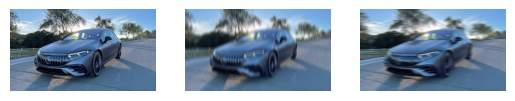

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def display_result(diagrams):
    """
    Display the images in a single plot.
    :param diagrams: a tuple of images to display.
    :return: None
    """
    fig, axs = plt.subplots(1, len(diagrams))
    for i, img in enumerate(diagrams):
        axs[i].imshow(img)
        axs[i].axis("off")
    plt.show()


if __name__ == "__main__":

    # specify the kernel size
    kernel_size = 8

    # create the vertical kernel.
    kernel_h = np.zeros((kernel_size, kernel_size))
    kernel_v = kernel_h.copy()

    # fill the middle row with ones
    kernel_h[int((kernel_size - 1)/2), :] = np.ones(kernel_size)
    kernel_v[:, int((kernel_size - 1)/2)] = np.ones(kernel_size)

    # normalize
    kernel_h /= kernel_size
    kernel_v /= kernel_size

    # load image
    img = cv2.imread("/opt/images/vehicle.png")

    # apply the vertical kernel.
    horizontal = cv2.filter2D(img, -1, kernel_h)
    vertical = cv2.filter2D(img, -1, kernel_v)

    # change bgr channels to rgb
    horizontal = cv2.cvtColor(horizontal, cv2.COLOR_BGR2RGB)
    vertical = cv2.cvtColor(vertical, cv2.COLOR_BGR2RGB)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # plot results
    display_result((img, vertical, horizontal))
